<a href="https://colab.research.google.com/github/franklinzhou-ncsu/new_repo_554/blob/main/ST_554_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

For this homework you will create a public `gitHub` repo and a python notebook (`.ipynb` file) using Google Colab. Yo'll save your Google Colab document on your `gitHub` repo (check the box that says 'Include a link to Colab'). You'll submit a link to your `gitHub` repo. Please make sure to change the sharing settings so that anyone with the link can see the notebook.

The purpose of this homework is to practice summarizing data using `pandas` and `matplotlib` and do some more advanced function writing.

# Summarizing Student Data Graphically

For this part, we'll revisit the [StudentData.txt](https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt) data that comes from the UCI machine learning repository. Information [about the variables in the dataset can be found here.](https://archive.ics.uci.edu/ml/datasets/Student+Performance) I want you to look at the math scores data set.

You should read up on the variables. The dataset is generally about math scores (G1, G2, G3) for students from two different schools. They also measure a bunch of things about the students' home life. Hopefully you can make some interesting connections!

## Bring in Homework 3 Code

- Copy your code and markdown cells from homework 3 that read in the data and summarized it numerically.
- We were essentially starting an EDA there.
- **Our goal is to now add to this basic EDA by including graphs that describe the variables.**

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
student_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep=";")

### Task 1

This data has many categorical variables and a few numeric. You should add the following:




#### Categorical variables

- Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for the plots.

##### *Stacked bar graph*

Text(0.5, 1.0, 'Count of stundets by Address and Gender')

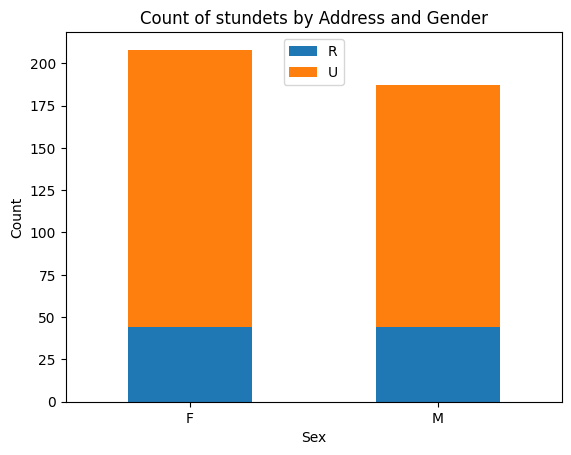

In [ ]:
# plot with pandas
stack_table = pd.crosstab(student_data['sex'], student_data['address'])

stack_table.plot.bar(stacked = True, rot = 0)
plt.legend(loc = 'upper center')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.title('Count of stundets by Address and Gender')

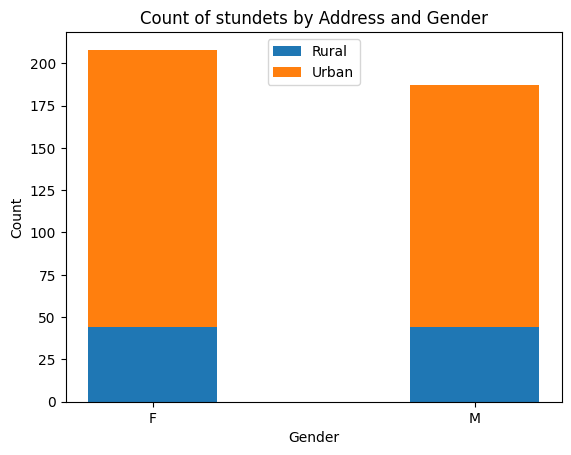

In [ ]:
# plot with matplotlib
sub_student_data = student_data.loc[:, ["sex", "address"]]
sub_student_data["sex"] = sub_student_data["sex"].astype("category")
sub_student_data["address"] = sub_student_data["address"].astype("category")

plt.bar(
    x = sub_student_data.sex.cat.categories,
    height = stack_table.loc[: , "R"],
    width = 0.4,
    label = "Rural"
)
plt.bar(
    x = sub_student_data.sex.cat.categories,
    height = stack_table.loc[: , "U"],
    bottom = stack_table.loc[:, "R"],
    width = 0.4,
    label = "Urban"
)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of stundets by Address and Gender")
plt.legend(loc = 9)


##### *Side-by-side bar graph:*

Text(0.5, 0, 'Sex')

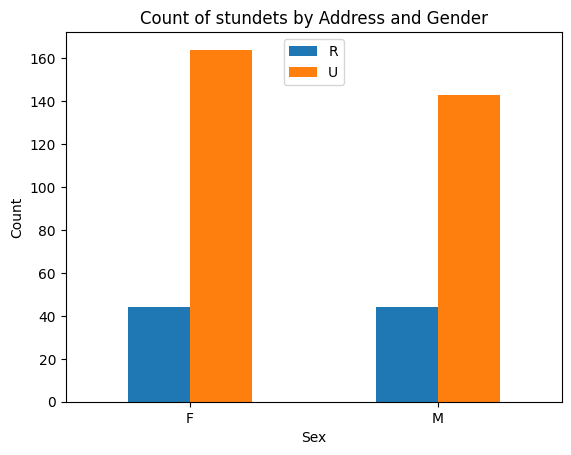

In [ ]:
# plot with pandas
stack_table.plot.bar(rot = 0)
plt.legend(loc = 'upper center')
plt.title('Count of stundets by Address and Gender')
plt.ylabel('Count')
plt.xlabel('Sex')

Text(0.5, 1.0, 'Count of stundets by Address and Gender')

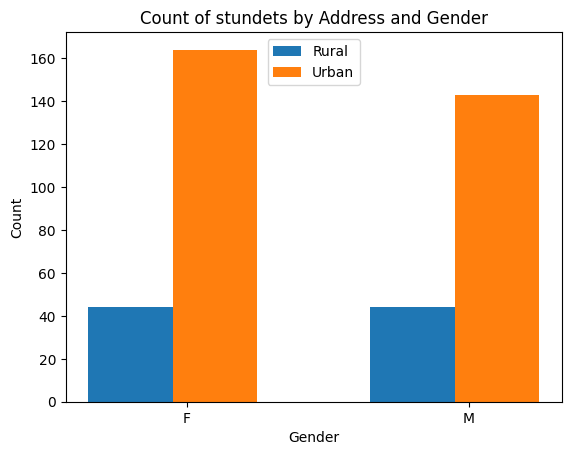

In [ ]:
# plot with matplotlib
plt.bar(
  x = [1, 2],
  height = stack_table.loc[:, "R"],
  width = 0.3,
  label = "Rural")
plt.bar(
  x = [1.3, 2.3],
  height = stack_table.loc[:, "U"],
  width = 0.3,
  label = "Urban")
plt.xticks([1.2, 2.2], sub_student_data.sex.cat.categories)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(loc = 9)
plt.title("Count of stundets by Address and Gender")

From the bar graph, we see that the total number of female students and male students in the data set are quite close. And their distributions over Address are silimar as well.

#### Numeric variables (and across groups)

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

- Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups). For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot. Add appropriate labels and titles.

- Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles.

**After each summary or graph, you should discuss what is interesting about it or what it tells you!**

In [ ]:
# some checks
print(len(student_data.loc[student_data["sex"] == "F", "G1"]))
print(len(student_data.loc[student_data["sex"] == "M", "G1"]))
print(max(student_data.G1))

208
187
19


##### *The histograms*

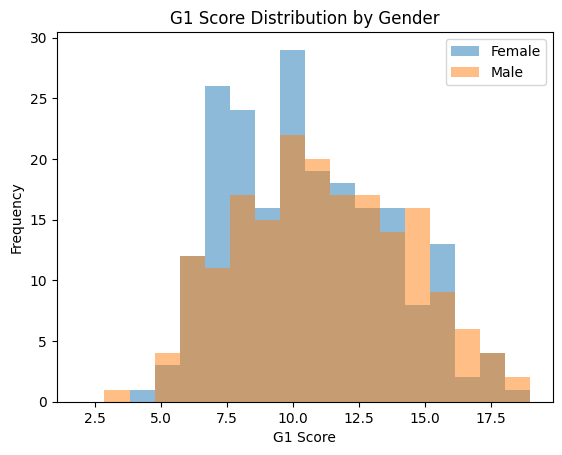

In [ ]:
# Overlaying histogram with pandas

bin_ends = 20
bins_list = [i*max(student_data.G1)/bin_ends for i in range(2, bin_ends + 1)]


G1_female = student_data.loc[student_data["sex"] == "F", "G1"]
G1_male = student_data.loc[student_data["sex"] == "M", "G1"]

G1_male = pd.concat([G1_male, pd.Series([np.nan for _ in range(len(G1_female)-len(G1_male))])])

G1_female.plot.hist(bins = bins_list, alpha = 0.5, label = "Female")
G1_male.plot.hist(bins = bins_list, alpha = 0.5, label = "Male")

plt.title("G1 Score Distribution by Gender")
plt.xlabel("G1 Score")
plt.legend()

The histogram output shows that the G1 score distributed similarly in male and female students.

##### *The kernal density plot*

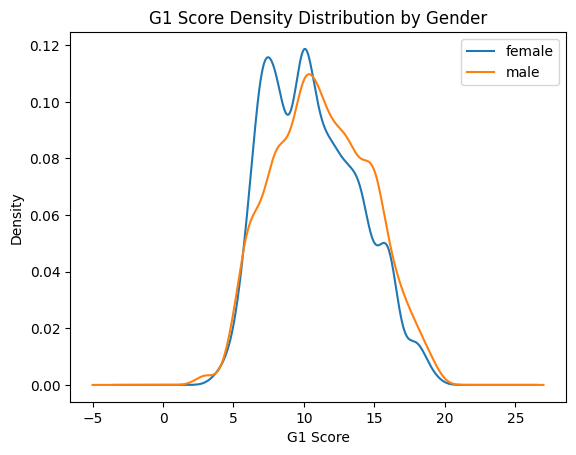

In [ ]:
G1_female.plot.density(bw_method = 0.2, label = "female")
G1_male.plot.density(bw_method = 0.2, label = "male")
plt.title("G1 Score Density Distribution by Gender")
plt.xlabel("G1 Score")
plt.legend()

The kernal density proofs the conclusion of histogram output: the G1 score distributed similarly in male and female students.

##### *Boxplot*

Text(0, 0.5, 'G2 Score')

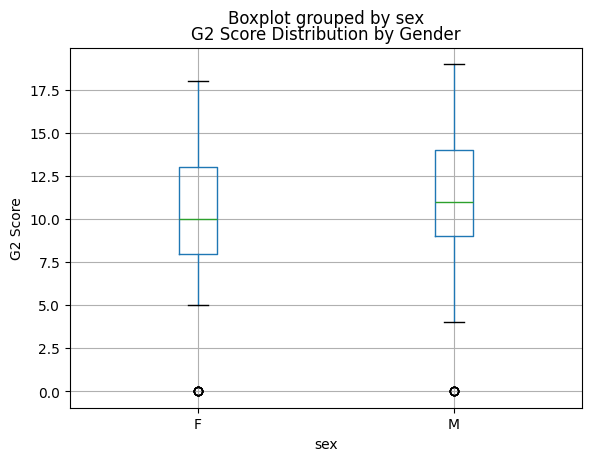

In [ ]:
student_data.boxplot(column = ["G2"], by = "sex")
plt.title("G2 Score Distribution by Gender")
plt.ylabel("G2 Score")

The boxplot shows that the male students have a little bit higher Q1, median and Q3 values than female students but with higher variability.

##### *scatterplots*

Text(0.5, 1.0, 'Distribution of G3 Score vs G1 Score by Gender')

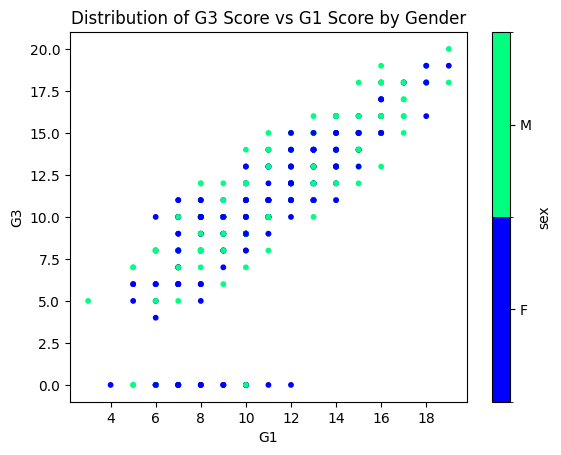

In [122]:
student_data["sex"] = student_data["sex"].astype("category")
student_data.plot.scatter(x = "G1", y = "G3", c = "sex", cmap = "winter", s = 10)
# cmap code: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.title("Distribution of G3 Score vs G1 Score by Gender")

The scatter plot of Distribution of G3 Score vs G1 Score by Gender shows that G1 and G3 score are linearly correlated for both male and female students but there are some bad records in the data set that the G3 scores are 0, probably due to missing the exam.

Text(0.5, 1.0, 'Distribution of G3 Score vs G2 Score by Address')

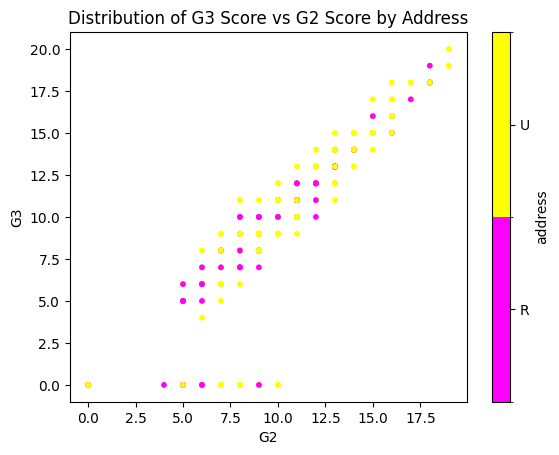

In [123]:
student_data["address"] = student_data["address"].astype("category")
student_data.plot.scatter(x = "G2", y = "G3", c = "address", cmap = "spring", s = 10)
plt.title("Distribution of G3 Score vs G2 Score by Address")

The scatter plot of Distribution of G3 Score vs G1 Score by Address shows that G1 and G3 score are linearly correlated for Rural and Urban students but there are some bad records in the data set that the G3 scores (and one G2 score) are 0, probably due to missing the exam.

# Plotting the NFL Data

For this part we'll read in the NFL Box Score data that we read in class videos. [The data is available here.](https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv)

You may not be familiar with (American) football, but each row of this dataset represents information about one particular game. The most important thing is the score for the home and away teams (`AQ1`, . . . , `AFinal`, `HQ`, . . . , `HFinal`). Other variables like yards gained (passing or rushing or combined) can be good indicators of score. Things like turnovers, penalties, etc. can also be indicators of how the game went.


## Task 1: Read in the data

- You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.

- Convert the `homeTeam`, `awayTeam`, `day`, `stadium`, `startTime`, `toss`, `roof`, and `surface` to category type variables.

In [18]:
# read in data
nfl_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv", sep=",")

# categorical variable list
cat_var = ["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]

# conver to category type variables
nfl_data[cat_var] = nfl_data[cat_var].astype("category")

# check one of the variables
nfl_data["homeTeam"].dtype.name


,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,Division,11-Jan,Sun,2014,Indianapolis Colts,0,14,7,3,-1,...,1,2,8,4,16,1,2,25.98,-11,7.0
3467,Division,11-Jan,Sun,2014,Dallas Cowboys,7,7,7,0,-1,...,1,10,87,9,14,0,0,29.35,5,6.0
3468,ConfChamp,18-Jan,Sun,2014,Green Bay Packers,13,3,0,6,0,...,1,8,40,8,16,1,1,31.07,6,8.5
3469,ConfChamp,18-Jan,Sun,2014,Indianapolis Colts,0,7,0,0,-1,...,0,6,45,12,18,2,2,37.82,38,7.0


## Task 2: Summarize the data

- I want you to look at some trends during the regular season. This means you should remove any data where the week is not 1 through 17.

- You should summarize some of the variables grouped by season and week, season alone, and week alone (three different scenarios).
    - Produce some common numeric summaries of variables across these different groups.
    - Similarly, produce some common plots over time (mostly line plots I'd think!)

- Write at least one function that can be used to easily create a plot for this data.
    - For instance, you might have a function that takes in a numeric variable and a statistic (or a categorical variable, etc.). Then the function plots the average (or some other statistic) of the numeric variable across the seasons.
    - This is just an example! You get to decide what might be useful to do here.
    - Add in type hints for the inputs (`pd.DataFrame` was one I used) using **annotations** in the function definition.
    - Don't worry about type hinting the output. If you are interested, something like this could work. . .
    - Add the `timeit` decorator used in the class notes as well so information is printed out about how long the code took to run.
    - Run this function with three different settings of inputs (to obtain three different graphs of the same type - or whatever it is your function does!)

**After each graph, you should discuss what is interesting about it or what it tells you!**

### 1. Select regular season data only

In [54]:
# regular season only
post_season = ["WildCard", "Division", "ConfChamp", "SuperBowl"]

# Python : 10 Ways to Filter Pandas DataFrame
# https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
nfl_regular = nfl_data[~nfl_data.week.isin(post_season)]

# change string to numeric
nfl_regular.week = nfl_regular.week.astype("int")

nfl_regular

/tmp/ipython-input-2544767786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_regular.week = nfl_regular.week.astype("int")


,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,17,28-Dec,Sun,2014,Chicago Bears,0,3,3,3,-1,...,0,4,25,8,15,0,1,28.45,4,7.0
3456,17,28-Dec,Sun,2014,San Diego Chargers,0,7,0,0,-1,...,0,7,46,2,12,0,0,28.65,12,2.5
3457,17,28-Dec,Sun,2014,Oakland Raiders,7,0,7,0,-1,...,1,1,16,7,15,1,1,33.02,33,14.0
3458,17,28-Dec,Sun,2014,Indianapolis Colts,7,10,0,10,-1,...,1,4,20,4,16,1,3,26.57,-17,-7.5


### 2. Summrize **Home team's total yards** (`HtotalYds`) variable grouped by season and week, season alone, and week alone.

In [48]:
# Average Home team's total Yards grouped by season
htotal_by_season = nfl_regular.groupby(["season"])["HtotalYds"].mean()
htotal_by_season

,HtotalYds
season,
2002,332.519531
2003,330.015625
2004,333.742188
2005,323.871094
2006,327.597656
2007,327.589844
2008,335.062500
2009,347.171875
2010,342.707031


Text(0, 0.5, 'Total Yards')

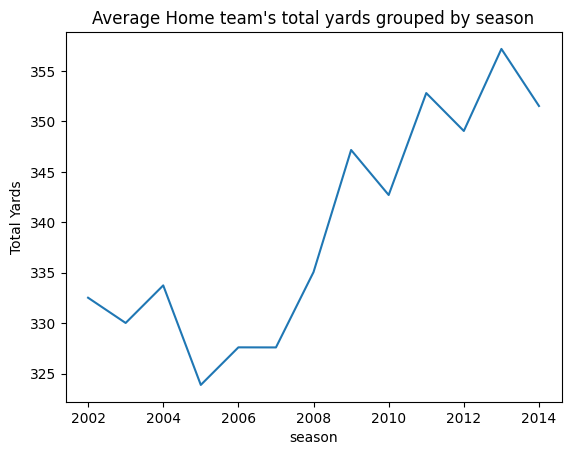

In [51]:
# plot
htotal_by_season.plot.line(x = "season", y = "HtotalYds")
plt.title("Average Home team's total yards grouped by season")
plt.ylabel("Total Yards")

We can see that the average home team's total yards is generally increasing since 2005.

In [55]:
# Average Home team's total Yards grouped by week
htotal_by_week = nfl_regular.groupby(["week"])["HtotalYds"].mean()
htotal_by_week

,HtotalYds
week,
1,330.889423
2,350.995169
3,342.272727
4,347.940217
5,341.417582
6,338.535912
7,329.977778
8,342.258427
9,336.252809


Text(0, 0.5, 'Total Yards')

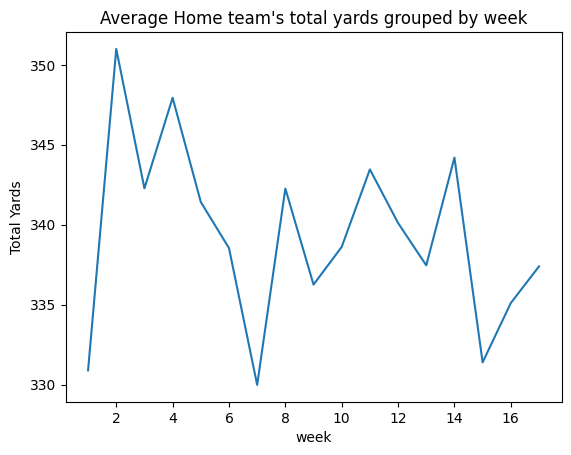

In [56]:
# plot
htotal_by_week.plot.line(x = "week", y = "HtotalYds")
plt.title("Average Home team's total yards grouped by week")
plt.ylabel("Total Yards")

This graph shows that Home team's average total yards are decreasing across the weeks in overall.

In [84]:
# Average Home team's total Yards grouped by season and week
htotal_by_season_week = pd.crosstab(
    nfl_regular.season,
    nfl_regular.week,
    values = nfl_regular.HtotalYds,
    aggfunc= "mean"
    )
htotal_by_season_week

week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
season,,,,,,,,,,,,,,,,,
2002,348.6250,306.812500,322.571429,346.857143,341.571429,344.785714,342.214286,310.785714,283.571429,374.857143,344.312500,329.375000,339.2500,343.8125,328.1875,314.8750,331.2500
2003,314.9375,314.062500,312.857143,346.142857,336.500000,332.428571,331.428571,313.214286,309.928571,325.357143,368.812500,328.125000,339.6250,350.5625,356.9375,330.1875,295.1250
2004,341.9375,298.500000,349.642857,321.142857,339.071429,305.571429,353.500000,383.428571,347.500000,349.071429,296.687500,320.375000,370.3125,342.3125,334.0000,314.4375,316.0000
2005,334.1875,358.187500,337.285714,341.714286,308.785714,336.357143,291.428571,332.857143,285.285714,343.142857,329.625000,338.750000,294.3125,324.6875,308.9375,337.8750,300.6250
2006,275.1250,379.375000,331.214286,327.071429,318.214286,326.307692,340.230769,311.500000,330.214286,341.437500,346.562500,322.750000,330.8125,364.6250,305.5625,289.2500,328.5625
2007,294.6875,372.562500,339.625000,310.785714,329.214286,331.384615,300.071429,300.769231,359.928571,305.000000,336.562500,326.250000,331.5625,351.6875,320.4375,315.9375,334.1250
2008,340.1250,304.466667,340.500000,333.769231,338.785714,350.214286,334.357143,344.357143,283.928571,338.428571,350.437500,328.125000,303.2500,330.7500,328.6250,352.6875,388.5625
2009,345.3125,377.937500,329.750000,339.714286,337.142857,374.642857,305.230769,352.230769,355.307692,341.666667,349.437500,384.625000,330.6875,341.5000,356.0625,337.8125,338.3750
2010,302.5000,369.375000,356.187500,329.285714,314.428571,336.500000,344.928571,367.923077,344.846154,383.214286,339.750000,331.937500,333.0625,333.1875,346.9375,362.2500,334.1875


### 3. Write a function to generate the average Total yards (`HtotalYds`) or Passing yards (`HnetPassYds`) of a home team (`homeTeam`) across the seasons (`season`).



In [103]:
# add timeit decorator
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

In [118]:
# write the function
@timeit
def make_plot(data: pd.DataFrame, num_var: str = "HtotalYds" , team: str = "Carolina Panthers", color = None):
    """
    A function to generate the average numerical variable of a home team across the seasons.
    The default numerical variable is "HtotalYds".
    The default home team is "Carolina Panthers".
    The default color is None.
    """
    data_plot = data[data['homeTeam'] == team].groupby(["season"])[num_var].mean() # select the data and generate the mean values
    data_plot.plot.line(x = "season", y = num_var, color = color) # make line plot
    plt.ylabel(num_var)
    plt.title(f"Home Average {num_var} by team {team} grouped by season")


make_plot ran in 0.029281 seconds


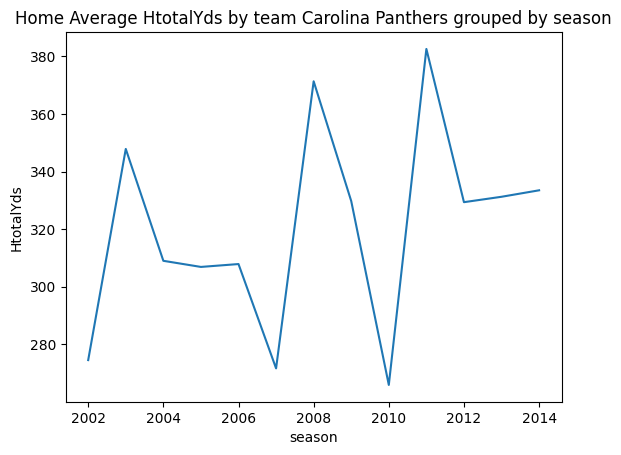

In [119]:
# call the function by default setting:
make_plot(data = nfl_regular)

The graph shows that Panthers's total yards of home games were not stable during the period. But overall is had a rising up trend.

make_plot ran in 0.032016 seconds


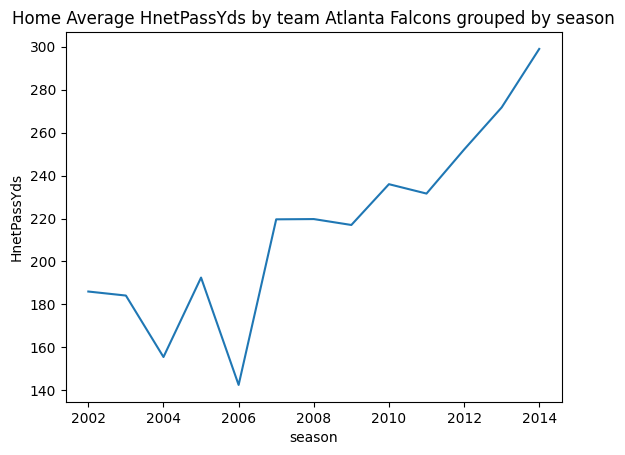

In [120]:
# call the function by setting numerical var to HnetPassYds and Home team to Atlanta Falcons
make_plot(data = nfl_regular, num_var= "HnetPassYds", team = "Atlanta Falcons")

The graph shows that Falcons' Net passing yards in home games was consistantly increasing after year 2007. Because Falcon drafted QB Matt Ryan in 2008 with the third pick in the first round.

make_plot ran in 0.028082 seconds


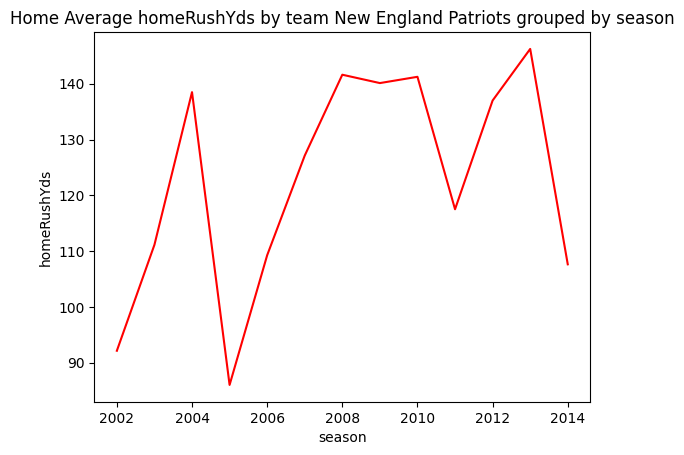

In [121]:
# call the function by setting numerical var to homeRushYds and Home team to New England Patriots with line color in red
make_plot(data = nfl_regular, num_var= "homeRushYds", team = "New England Patriots", color = "red")

Patriots' home rushing yards was extreme low in year 2025 because its lead RB Corey Dillon suffered ankle and calf injuries in that season.